In [1]:
#
import random
import cv2 as cv
import numpy as np
from IPython.display import Image


In [2]:
N = 500
datac = [0, 0, 255]

In [3]:
seed = lambda: random.randint(0, 255)
color = {_: [seed(), seed(), seed()] for _  in range(-1, 100)}

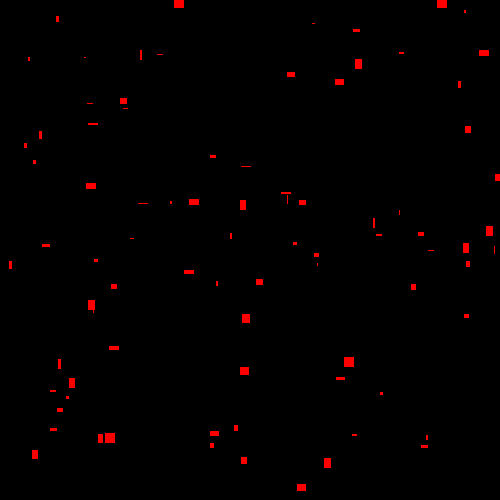

In [4]:
img = np.random.randint(0, 1, size=(N, N, 3))
img[:, :] = 0
for _ in range(100):
    _r1 = random.randint(0, N-1)
    _r2 = random.randint(0, 10)
    _r3 = random.randint(0, N-1)
    _r4 = random.randint(0, 10)
    img[_r1:_r1+_r2, _r3:_r3+_r4] = datac
cv.imwrite("temp/base.png", img)

Image("temp/base.png", height=300, width=300)


In [5]:

point = []
img = cv.imread("temp/base.png")
for _y in range(N):
    for _x in range(N):
        if (img[_y, _x] == np.array(datac)).all():
            point.append([_y, _x])
# point

### AgglomerativeClustering

n_clusters：聚类的个数

linkage：指定层次聚类判断相似度的方法，有以下三种：

    ward：组间距离等于两类对象之间的最小距离。（即single-linkage聚类）

    average：组间距离等于两组对象之间的平均距离。（average-linkage聚类）

    complete：组间距离等于两组对象之间的最大距离。（complete-linkage聚类

number of estimated clusters : 10


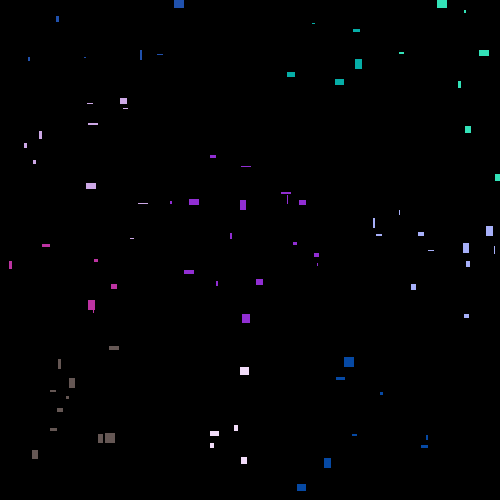

In [6]:
from sklearn.cluster import AgglomerativeClustering

centers = [[1, 1], [-1, -1], [1, -1]]
X = np.array(point)
ms = AgglomerativeClustering(linkage=['ward', 'average', 'complete'][2], n_clusters=10)
ms.fit(X)
labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

img = np.random.randint(0, 1, size=(N, N, 3))
img[:, :] = 0
d_point = {_: [] for _ in range(n_clusters_)}
for _p, _c in zip(point, labels):
    img[_p[0], _p[1]] = color[_c]
    d_point[_c].append(_p[::-1])
cv.imwrite("temp/base_clusters.png", img)

Image("temp/base_clusters.png", height=300, width=300)


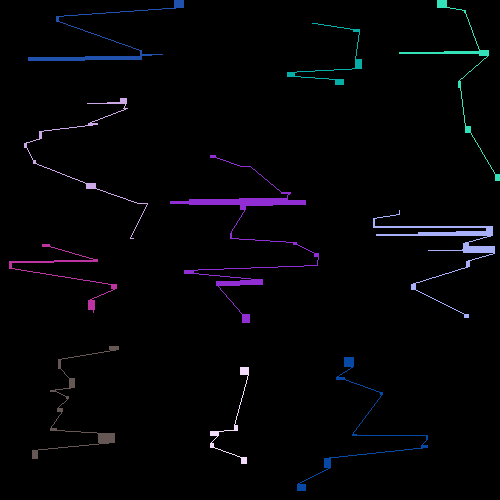

In [7]:
img = np.random.randint(0, 1, size=(N, N, 3))
img[:, :] = 0
img = img.astype(np.uint8)
for _c, _p in d_point.items():
    img = cv.polylines(img, [np.array(_p)], False, tuple(color[_c]), 1)
cv.imwrite("temp/base_clusters_point.png", img)

Image("temp/base_clusters_point.png", height=300, width=300)


### Mean-shift

bandwidth ：半径(或带宽)，float型。如果没有给出，则使用sklearn.cluster.estimate_bandwidth计算出半径(带宽).（可选）

seeds :圆心（或种子），数组类型，即初始化的圆心。（可选）

bin_seeding ：布尔值。如果为真，初始内核位置不是所有点的位置，而是点的离散版本的位置，其中点被分类到其粗糙度对应于带宽的网格上。将此选项设置为True将加速算法，因为较少的种子将被初始化。默认值：False.如果种子参数(seeds)不为None则忽略。


number of estimated clusters : 3


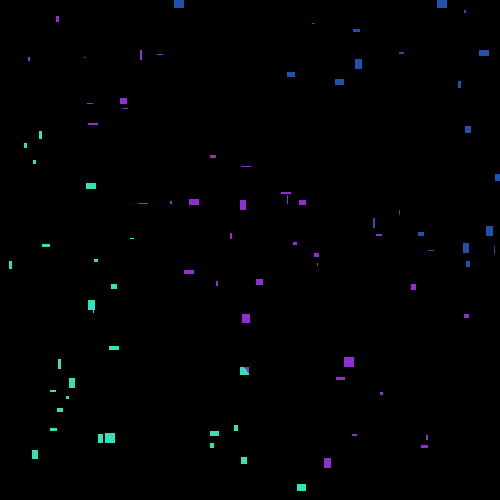

In [8]:
from sklearn.cluster import MeanShift, estimate_bandwidth

centers = [[1, 1], [-1, -1], [1, -1]]
X = np.array(point)
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=1000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

img = np.random.randint(0, 1, size=(N, N, 3))
img[:, :] = 0
d_point = {_: [] for _ in range(n_clusters_)}
for _p, _c in zip(point, labels):
    img[_p[0], _p[1]] = color[_c]
    d_point[_c].append(_p[::-1])
cv.imwrite("temp/base_clusters.png", img)

Image("temp/base_clusters.png", height=300, width=300)


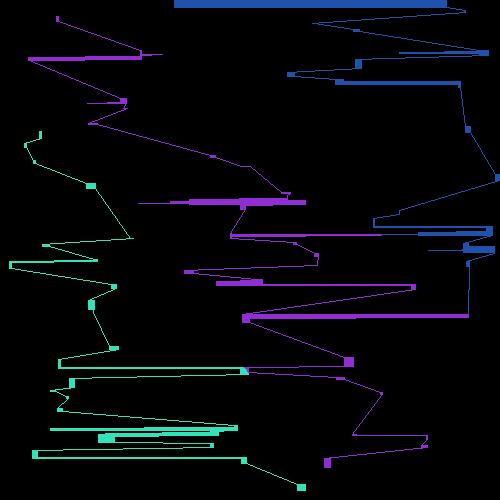

In [9]:
img = np.random.randint(0, 1, size=(N, N, 3))
img[:, :] = 0
img = img.astype(np.uint8)
for _c, _p in d_point.items():
    img = cv.polylines(img, [np.array(_p)], False, tuple(color[_c]), 1)
cv.imwrite("temp/base_clusters_point.png", img)

Image("temp/base_clusters_point.png", height=300, width=300)


### Spectral Clustering

n_clusters：聚类的个数。（官方的解释：投影子空间的维度）

affinity：核函数，默认是’rbf’，可选：“nearest_neighbors”，“precomputed”,"rbf"或sklearn.metrics.pairwise_kernels支持的其中一个内核之一。

gamma :affinity指定的核函数的内核系数，默认1.0

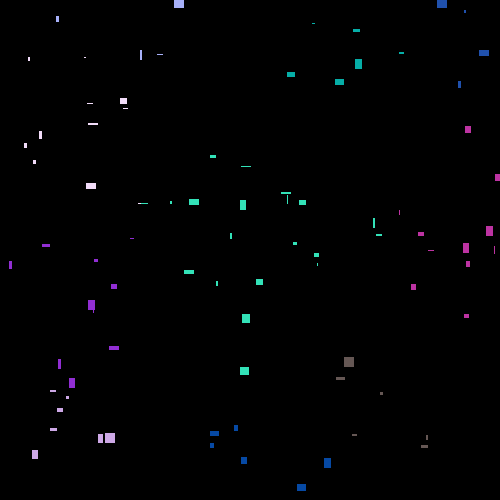

In [10]:
from sklearn import metrics
from sklearn.cluster import spectral_clustering

X = np.array(point)
metrics_metrix = (-1 * metrics.pairwise.pairwise_distances(X)).astype(np.int32)
metrics_metrix += -1 * metrics_metrix.min()

n_clusters_= 10
labels = spectral_clustering(metrics_metrix, n_clusters=n_clusters_, affinity="nearest_neighbors")

img = np.random.randint(0, 1, size=(N, N, 3))
img[:, :] = 0
d_point = {_: [] for _ in range(n_clusters_)}
for _p, _c in zip(point, labels):
    img[_p[0], _p[1]] = color[_c]
    d_point[_c].append(_p[::-1])
cv.imwrite("temp/base_clusters.png", img)

Image("temp/base_clusters.png", height=300, width=300)


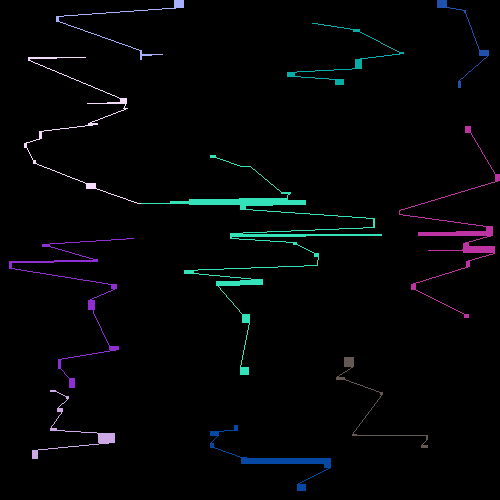

In [11]:
img = np.random.randint(0, 1, size=(N, N, 3))
img[:, :] = 0
img = img.astype(np.uint8)
for _c, _p in d_point.items():
    img = cv.polylines(img, [np.array(_p)], False, tuple(color[_c]), 1)
cv.imwrite("temp/base_clusters_point.png", img)

Image("temp/base_clusters_point.png", height=300, width=300)


### DBSCAN

eps:两个样本之间的最大距离，即扫描半径

min_samples ：作为核心点的话邻域(即以其为圆心，eps为半径的圆，含圆上的点)中的最小样本数(包括点本身)。

number of estimated clusters : 1


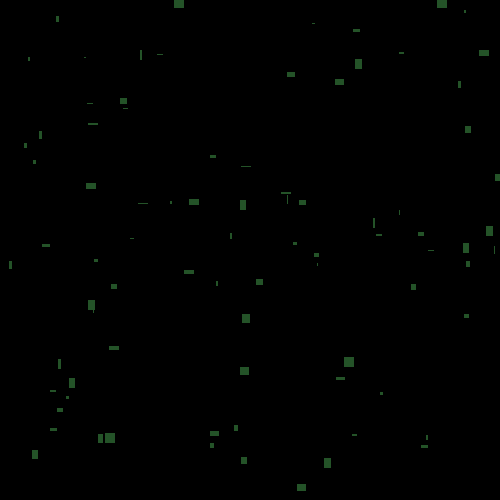

In [12]:
from sklearn.cluster import DBSCAN

X = np.array(point)
ms = DBSCAN(eps=0.1, min_samples=100)
ms.fit(X)

core_samples_mask = np.zeros_like(ms.labels_, dtype=bool)
core_samples_mask[ms.core_sample_indices_] = True
labels = ms.labels_

n_clusters_ = len(np.unique(labels))
print("number of estimated clusters : %d" % n_clusters_)

img = np.random.randint(0, 1, size=(N, N, 3))
img[:, :] = 0
d_point = {_: [] for _ in range(-1, n_clusters_)}
for _p, _c in zip(point, labels):
    img[_p[0], _p[1]] = color[_c]
    d_point[_c].append(_p[::-1])
cv.imwrite("temp/base_clusters.png", img)

Image("temp/base_clusters.png", height=300, width=300)


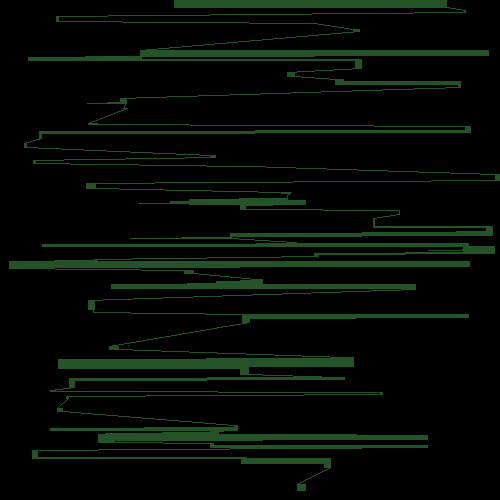

In [13]:
img = np.random.randint(0, 1, size=(N, N, 3))
img[:, :] = 0
img = img.astype(np.uint8)
for _c, _p in d_point.items():
    img = cv.polylines(img, [np.array(_p)], False, tuple(color[_c]), 1)
cv.imwrite("temp/base_clusters_point.png", img)

Image("temp/base_clusters_point.png", height=300, width=300)


### Birch

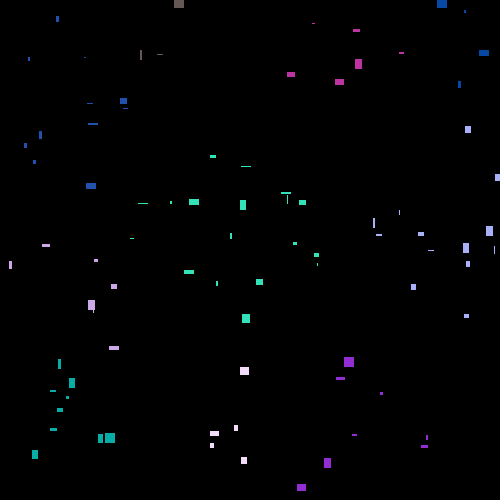

In [14]:
from sklearn.cluster import Birch

X = np.array(point)
n_clusters_= 10
birch = Birch(n_clusters=n_clusters_)
labels = birch.fit_predict(X)

img = np.random.randint(0, 1, size=(N, N, 3))
img[:, :] = 0
d_point = {_: [] for _ in range(n_clusters_)}
for _p, _c in zip(point, labels):
    img[_p[0], _p[1]] = color[_c]
    d_point[_c].append(_p[::-1])
cv.imwrite("temp/base_clusters.png", img)

Image("temp/base_clusters.png", height=300, width=300)


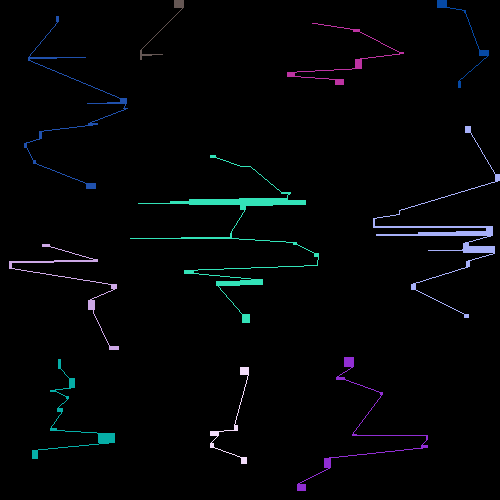

In [15]:
img = np.random.randint(0, 1, size=(N, N, 3))
img[:, :] = 0
img = img.astype(np.uint8)
for _c, _p in d_point.items():
    img = cv.polylines(img, [np.array(_p)], False, tuple(color[_c]), 1)
cv.imwrite("temp/base_clusters_point.png", img)

Image("temp/base_clusters_point.png", height=300, width=300)


### GaussianMixture

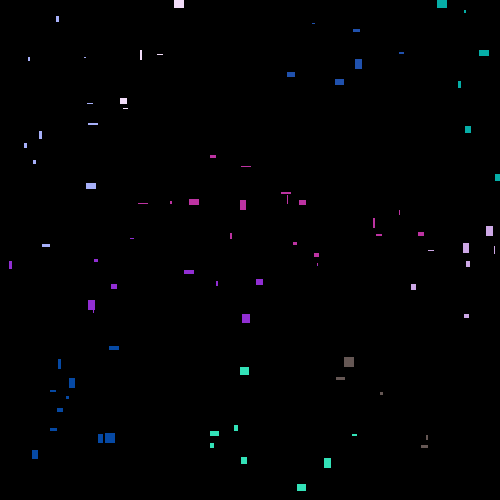

In [16]:
from sklearn.mixture import GaussianMixture

X = np.array(point)
n_clusters_= 10
ms = GaussianMixture(n_components=n_clusters_, covariance_type='full')
ms.fit(X)

labels = ms.fit_predict(X)

img = np.random.randint(0, 1, size=(N, N, 3))
img[:, :] = 0
d_point = {_: [] for _ in range(n_clusters_)}
for _p, _c in zip(point, labels):
    img[_p[0], _p[1]] = color[_c]
    d_point[_c].append(_p[::-1])
cv.imwrite("temp/base_clusters.png", img)

Image("temp/base_clusters.png", height=300, width=300)


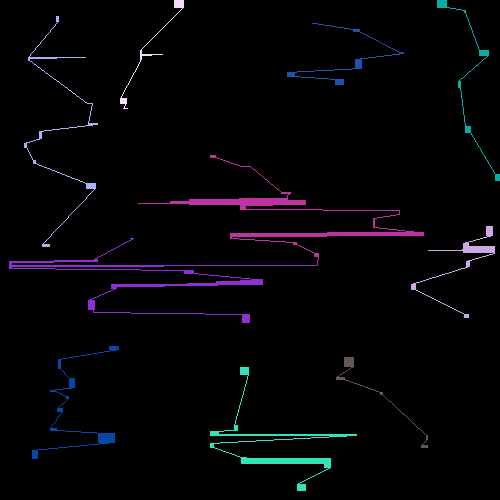

In [17]:
img = np.random.randint(0, 1, size=(N, N, 3))
img[:, :] = 0
img = img.astype(np.uint8)
for _c, _p in d_point.items():
    img = cv.polylines(img, [np.array(_p)], False, tuple(color[_c]), 1)
cv.imwrite("temp/base_clusters_point.png", img)

Image("temp/base_clusters_point.png", height=300, width=300)
